In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread(r'C:\Phonee\ML_Project\DataSet\YOUNG\15_1_0_20170103200925950.jpg')
print(img.shape)


(751, 602, 3)


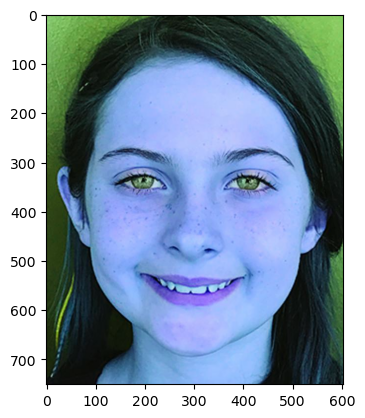

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(751, 602)

In [9]:
gray

array([[171, 169, 166, ..., 158, 163, 164],
       [171, 168, 166, ..., 154, 162, 163],
       [170, 168, 167, ..., 151, 160, 161],
       ...,
       [ 14,  15,  16, ...,  76,  55,  44],
       [ 16,  16,  15, ...,  81,  62,  48],
       [ 18,  16,  15, ...,  84,  67,  52]], dtype=uint8)

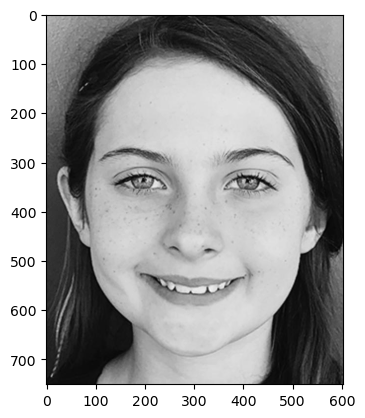

In [10]:
plt.imshow(gray, cmap='gray')

In [27]:
face_cascade = cv2.CascadeClassifier(r'C:\Phonee\ML_Project\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Phonee\ML_Project\opencv\haarcascades\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 45, 142, 509, 509]])

In [28]:
(x,y,w,h) = faces[0]
x,y,w,h

(45, 142, 509, 509)

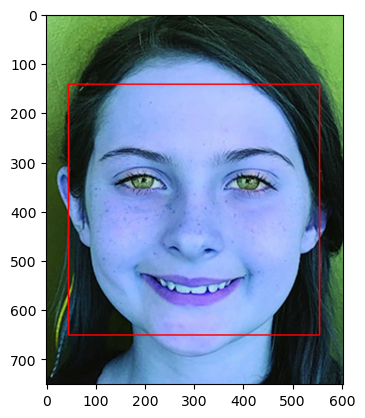

In [29]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

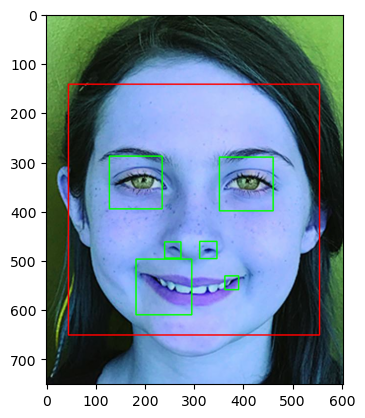

In [30]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

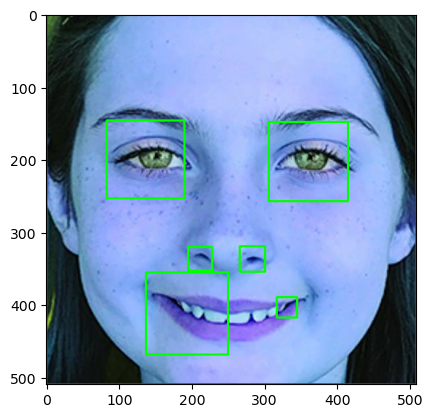

In [31]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

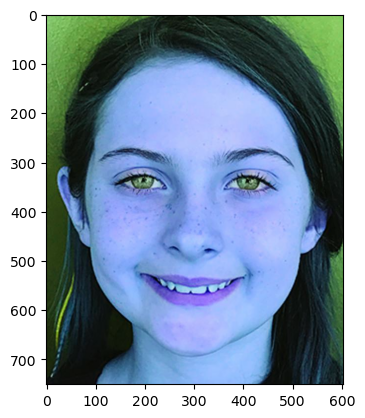

In [34]:
original_image = cv2.imread(r'C:\Phonee\ML_Project\DataSet\YOUNG\15_1_0_20170103200925950.jpg')
plt.imshow(original_image)

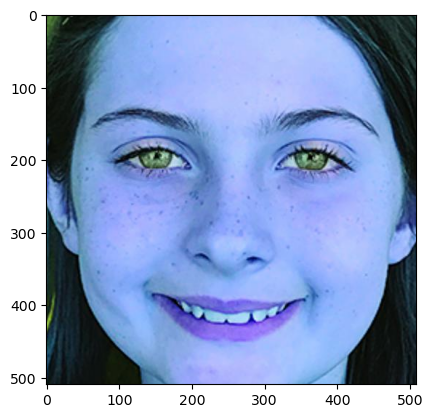

In [35]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Phonee\ML_Project\DataSet\YOUNG\15_1_0_20170103200925950.jpg')
plt.imshow(cropped_image)

In [67]:
path_to_data = r"C:\Phonee\ML_Project\DataSet"
import os

# Example paths
path_to_cr_data = 'C:/Phonee/ML_Project/CroppedC/'
celebrity_name = 'ExampleCelebrityName'

# Combine the paths
cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

# Check if the directory already exists or create it
if not os.path.exists(cropped_folder):
    os.makedirs(cropped_folder)
    print("Generating cropped images in folder:", cropped_folder)


Generating cropped images in folder: C:/Phonee/ML_Project/CroppedC/ExampleCelebrityName


In [68]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [69]:
img_dirs

['C:\\Phonee\\ML_Project\\DataSet\\MIDDLE',
 'C:\\Phonee\\ML_Project\\DataSet\\OLD',
 'C:\\Phonee\\ML_Project\\DataSet\\YOUNG']

In [70]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [72]:
import os

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


C:\Phonee\ML_Project\DataSet\MIDDLE
C:\Phonee\ML_Project\DataSet\OLD
C:\Phonee\ML_Project\DataSet\YOUNG
